In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats
import utilities

Data Import and Organization 

you can download the dataset from this Website - https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength

In [12]:
pip install xlrd

  Using cached xlrd-2.0.2-py2.py3-none-any.whl.metadata (3.5 kB)
Using cached xlrd-2.0.2-py2.py3-none-any.whl (96 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Mr_Life\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [3]:
df = pd.read_excel(r"C:\Users\Mr_Life\Desktop\PHD Application\CU BOULDER Application\machine learning project\concrete+compressive+strength\Concrete_Data.xls")

In [4]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [5]:
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [12]:
# converting the dataframe to numpy arrays of features and targets

In [6]:
data = df.to_numpy()
x = data[:,0:8] # input features
y = data[:,8] # Target

ML Model Building and Training 

Train-Test-Split

In [7]:
nrows = x.shape[0]

train_percent = 0.8 # Using 80% data for training and 30% data for testing

nrows_train = int(nrows*train_percent)

x_train = x[:nrows_train, :]
y_train = y[:nrows_train]

x_test = x[nrows_train:, :]
y_test = y[nrows_train:]


Feature Scaling

In [8]:
from utilities import feature_normalization
X_normal, X_mean, X_std = feature_normalization(x_train)

print('Mean = ', X_std)
print('Standard Deviation = ', X_std)
print('Normalised Input Features = ', X_normal)

Mean =  [104.36231521  85.46642242  61.1284746   21.94621923   6.24190439
  73.33222359  82.85179435  69.87100906]
Standard Deviation =  [104.36231521  85.46642242  61.1284746   21.94621923   6.24190439
  73.33222359  82.85179435  69.87100906]
Normalised Input Features =  [[ 2.34874658 -0.77040063 -0.75933798 ...  0.72119665 -1.22580195
  -0.31677652]
 [ 2.34874658 -0.77040063 -0.75933798 ...  0.9257452  -1.22580195
  -0.31677652]
 [ 0.36048099  0.89692082 -0.75933798 ... -0.75155291 -2.21552101
   3.14674867]
 ...
 [ 0.25986996 -0.77040063 -0.75933798 ... -0.17881697  0.27084639
  -0.51714575]
 [ 0.25986996 -0.77040063 -0.75933798 ... -0.17881697  0.27084639
  -0.31677652]
 [ 0.25986996 -0.77040063 -0.75933798 ... -0.17881697  0.27084639
   1.85866079]]


Machine learning Configuration

In [11]:
import numpy as np
from utilities import compute_cost, compute_gradient, feature_normalization

# Assuming you have X_train, y_train defined somewhere
X_normal, mean, std = feature_normalization(x_train)

# Initialize weights and bias
w_final = np.zeros(X_normal.shape[1]) + 0.1
b_final = 0.1

# Hyperparameters
numIter = 1000
LR = 1e-1

# Starting cost
cost = compute_cost(X_normal, y_train, w_final, b_final)
print(f"Starting values =======\nInitial Cost = {cost}\nWeights = {w_final}\nBias = {b_final}")

# Gradient descent loop
for i in range(numIter):
    dw, db = compute_gradient(X_normal, y_train, w_final, b_final)
    w_final -= LR * dw
    b_final -= LR * db

    if i % 100 == 0:
        cost = compute_cost(X_normal, y_train, w_final, b_final)
        print(f"Iteration {i}: Cost = {cost}")

# Final results
final_cost = compute_cost(X_normal, y_train, w_final, b_final)
print(f"\nTraining complete\nFinal Cost = {final_cost}\nFinal Weights = {w_final}\nFinal Bias = {b_final}")



Starting values =======
Initial Cost = 817.1788820175002
Weights = [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
Bias = 0.1
Iteration 0: Cost = 670.0273130154616
Iteration 100: Cost = 59.5271123071208
Iteration 200: Cost = 59.09638541898106
Iteration 300: Cost = 58.93021569171958
Iteration 400: Cost = 58.84288517742827
Iteration 500: Cost = 58.795005372955664
Iteration 600: Cost = 58.76863047558357
Iteration 700: Cost = 58.754094222964355
Iteration 800: Cost = 58.746082270428985
Iteration 900: Cost = 58.741666292432036

Training complete
Final Cost = 58.739250178420896
Final Weights = [10.47565487  7.15945691  4.71413574 -4.19218994  2.5648534   0.79619788
 -0.06992159  8.09594071]
Final Bias = 36.557486959792456


In [12]:
# Predictions on training set
yp = np.dot(X_normal, w_final) + b_final
print("Predictions (yp) = ", yp)

Predictions (yp) =  [52.37522721 52.53808833 56.78639491 67.79402709 60.11319795 26.80314566
 68.58293173 29.53480496 19.61921729 31.11261424 28.82834862 21.64442025
 58.36420419 25.54089824 20.250341   28.69651679 30.11680767 59.92959148
 36.71873333 48.72482572 47.93592108 22.9328793  20.036134   40.54509078
 60.56071519 49.55308301 57.57529955 38.49367619 30.3237096  28.67934818
 59.29846777 58.66734406 39.25663173 59.15310883 57.40509664 55.20858564
 27.16809105 35.92982869 38.2965426  44.78030253 28.06539308 69.37183636
 66.21621781 39.1247999  37.50763797 27.89044354 23.51395781 47.14701644
 24.73482499 27.1015389  46.3581118  35.96918135 34.35201942 27.43426937
 20.49961324 19.21115419 70.160741   18.74767494 37.86255248 28.74590033
 48.29083559 47.65971188 18.73718236 46.39746446 37.23142877 48.9219593
 61.401657   26.31263427 18.35696987 49.64746021 48.93578595 48.74399479
 51.99785012 54.24322359 53.81654874 49.757885   66.817182   51.99785012
 44.89235563 60.80034489 51.9978

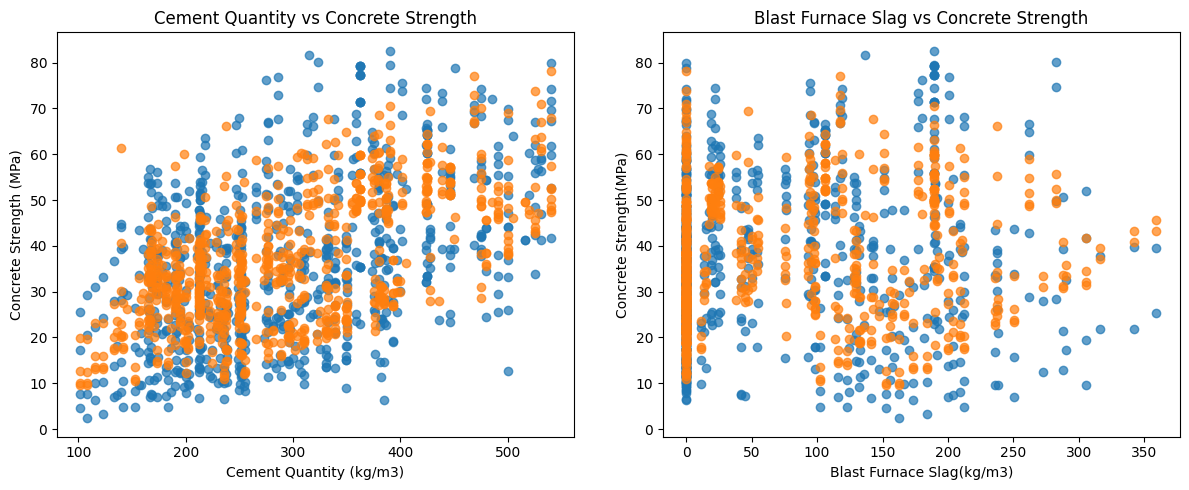

In [14]:
# Create subplot: Cement Quantity vs Concrete Strength and Blast Furnace Slag vs Concrete Strength
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Subplot 1: Cement Quantity vs Concrete Strength
axes[0].scatter(x_train[:,0], y_train, label='Actual', alpha=0.7)
axes[0].scatter(x_train[:,0], yp, label='Predicted', alpha=0.7)
axes[0].set_xlabel('Cement Quantity (kg/m3)') 
axes[0].set_ylabel('Concrete Strength (MPa)')
axes[0].set_title('Cement Quantity vs Concrete Strength')


# Subplot 2: Blast Furnace Slag vs Concrete Strength
axes[1].scatter(x_train[:,1], y_train, label='Actual', alpha=0.7)
axes[1].scatter(x_train[:,1], yp, label='Predicted', alpha=0.7)
axes[1].set_xlabel('Blast Furnace Slag(kg/m3)')
axes[1].set_ylabel('Concrete Strength(MPa)')
axes[1].set_title('Blast Furnace Slag vs Concrete Strength')


#adjust spacing between subplots
plt.tight_layout(w_pad=3)  # Combined subplots_adjust with tight_layout
plt.show()

# lets plot all features against target 

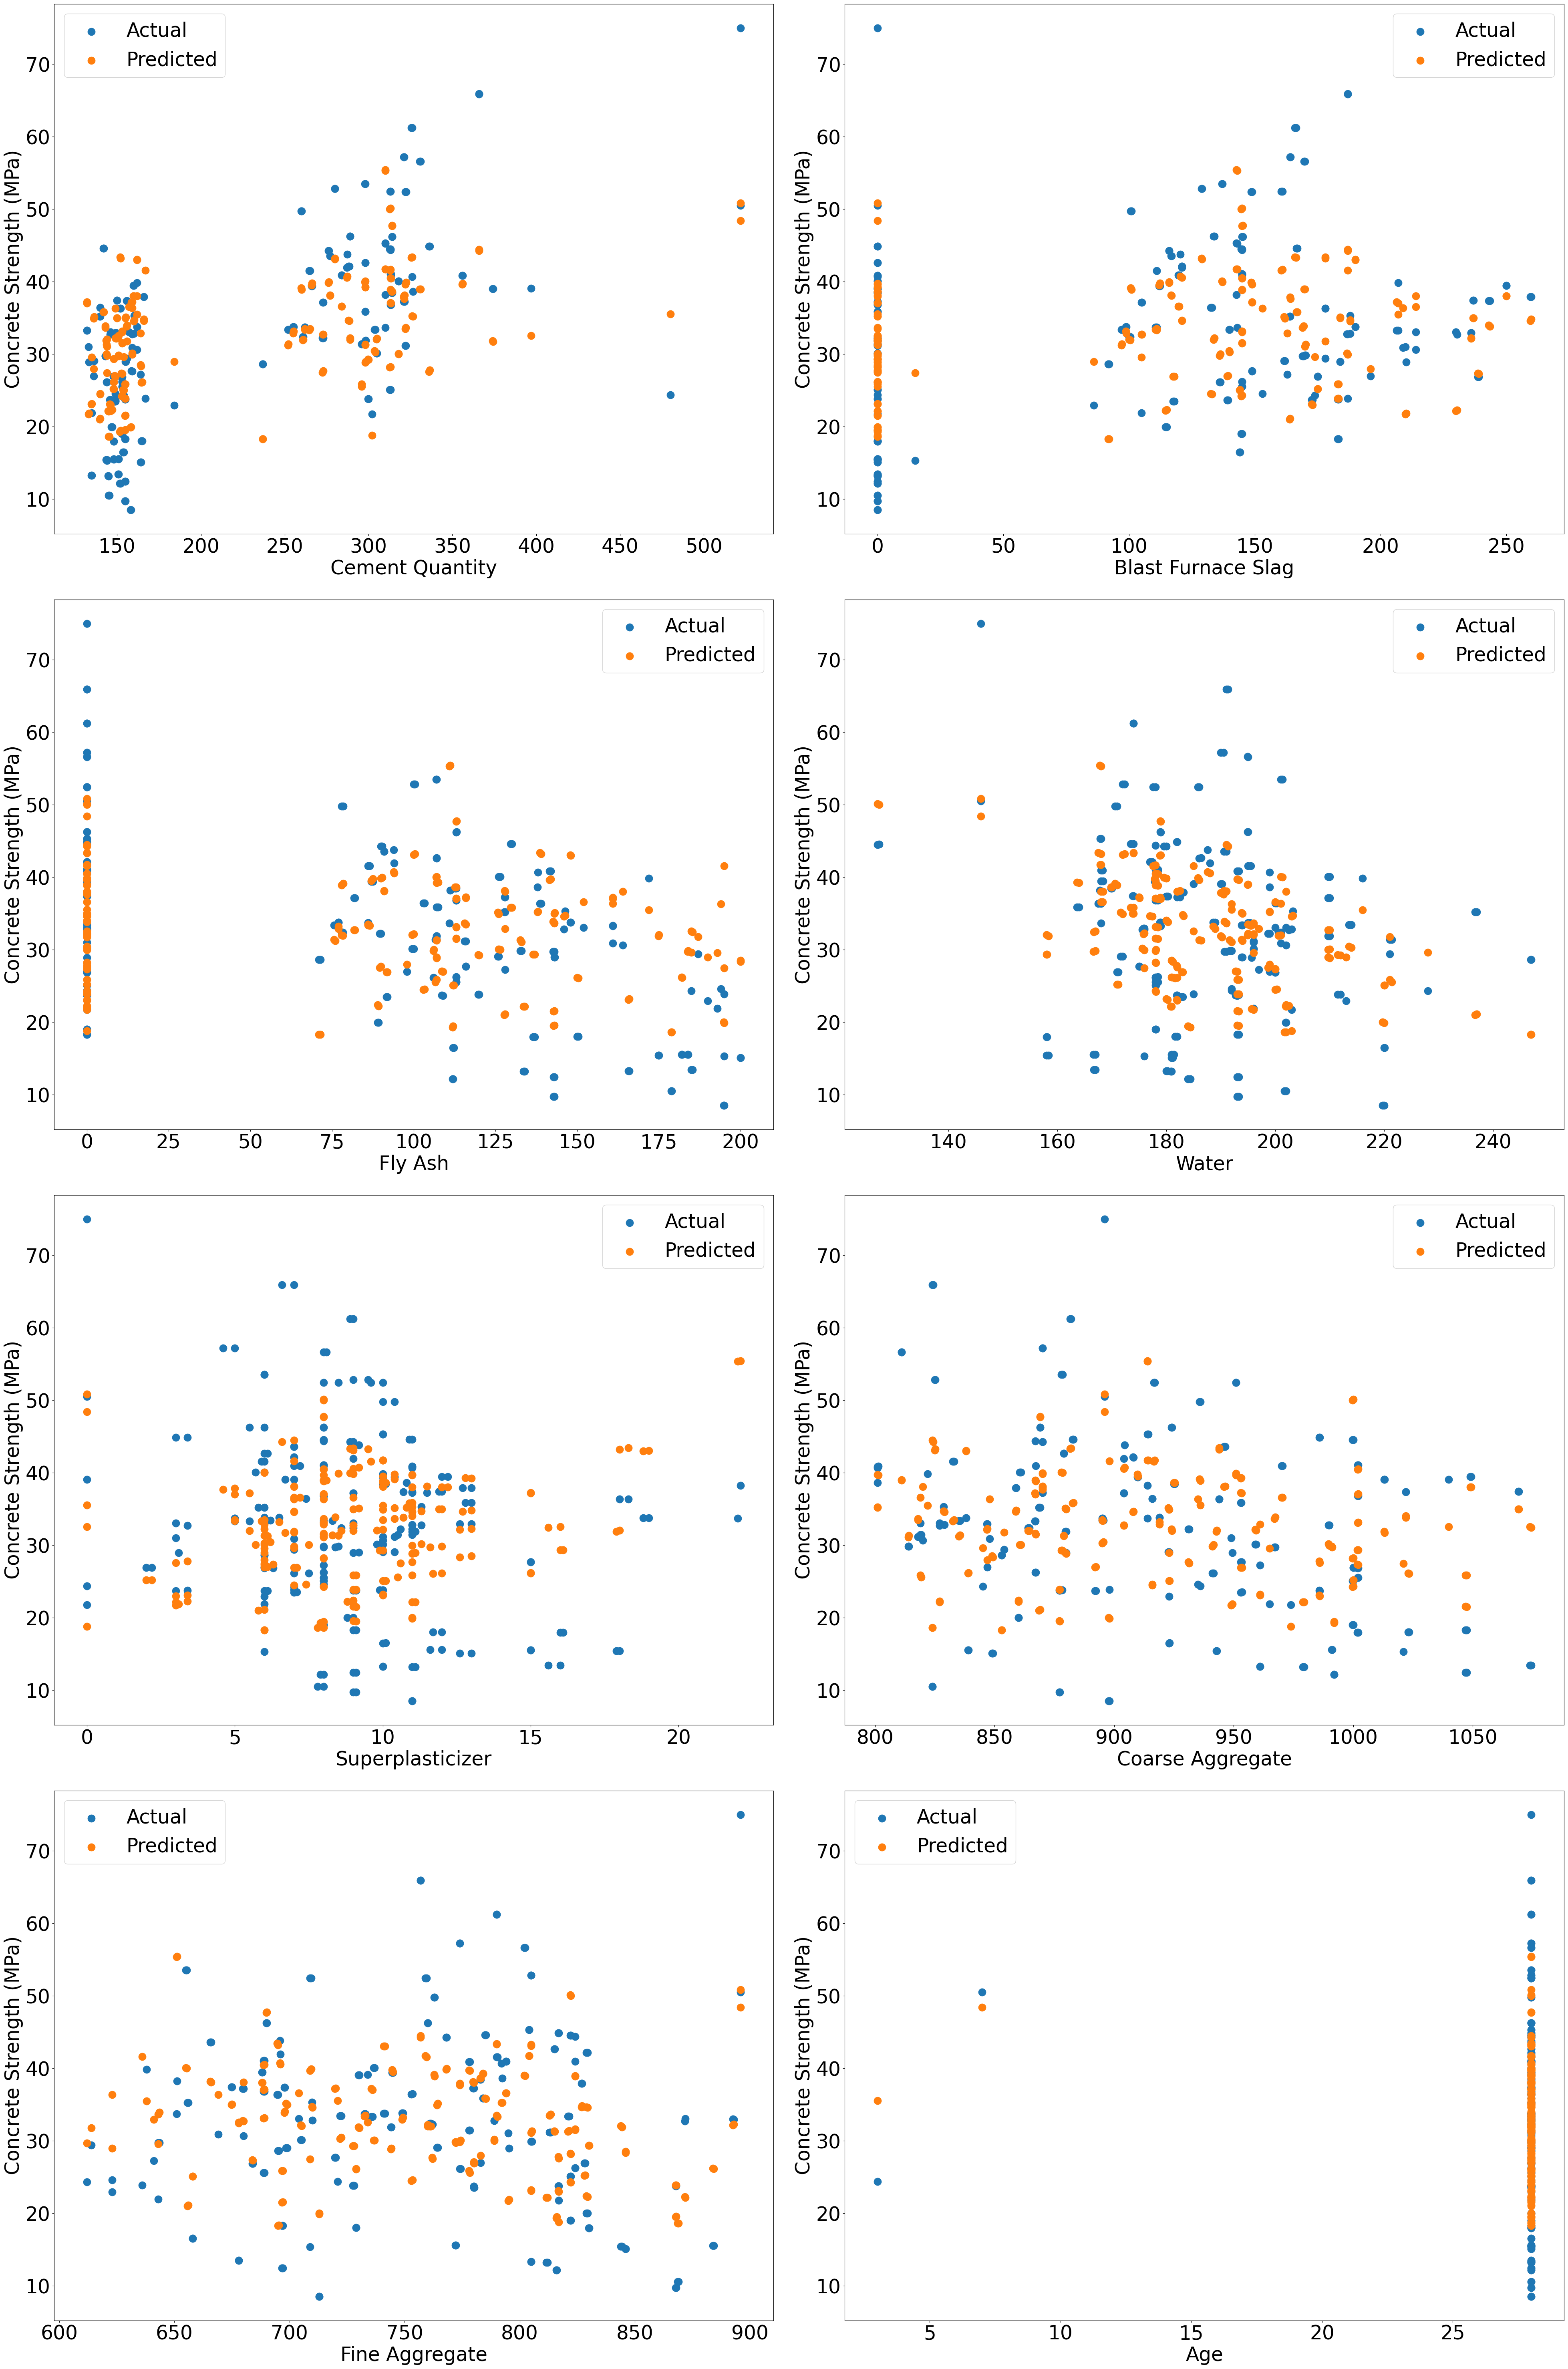

In [21]:
plt.rcParams.update({'font.size': 35})  # Update font sizes for all subplots
fig, axes = plt.subplots(4, 2, figsize=(40, 60))

feature_title = [
    'Cement Quantity', 
    'Blast Furnace Slag', 
    'Fly Ash',
    'Water', 
    'Superplasticizer', 
    'Coarse Aggregate', 
    'Fine Aggregate',  # Fixed typo ("Agregate" → "Aggregate")
    'Age'
]

for row in range(axes.shape[0]):  # Fixed: Added 'in' keyword
    for col in range(axes.shape[1]):
        feature_id = row * axes.shape[1] + col
        axes[row, col].scatter(x_test[:, feature_id], y_test, s=175, label='Actual')  # Added label
        axes[row, col].scatter(x_test[:, feature_id], y_test_predict, s=175, label='Predicted')  # Added label
        axes[row, col].set_xlabel(feature_title[feature_id])
        axes[row, col].set_ylabel('Concrete Strength (MPa)')
        axes[row, col].legend()  # Added legend to distinguish Actual vs Predicted

# Adjust spacing between subplots
plt.tight_layout()  # Better than subplots_adjust for automatic spacing
plt.show()

In [22]:
# Saving the ML model data for future predictions

In [23]:
pred_guidelines = """
x_norm = (x_inpute - feature_mean) / feature_std # This is a numpy broadcasting operation
y_predict = np.dot(x_norm, weights_norm) + bias_norm

feature_title = ['Cement Quantity',              # Kg/m3
                 'Blast Furnace Slag',           # Kg/m3
                 'Fly Ash',                      # Kg/m3
                 'Water',                        # Kg/m3
                 'Superplasticizer',             # Kg/m3
                 'Coarse Aggregate',             # Kg/m3
                 'Fine Aggregate',               # Kg/m3
                 'Age']                          # days

only one output is expected, that is concrete strength in Mpa
"""
                 

In [44]:
np.savez('concrete_strength_ml_data.npz', weights_norm=w_final, 
                                          bias_norm=b_final, 
                                          feature_mean=X_mean,
                                          feature_std=X_std,
                                          pred_guidelines=pred_guidelines)

In [28]:
# load ML Data

In [45]:
model_data = np.load('concrete_strength_ml_data.npz')

In [31]:
# lets print information stored in the model_data

In [46]:
print (model_data.files)

['weights_norm', 'bias_norm', 'feature_mean', 'feature_std', 'pred_guidelines']


In [36]:
# Lets see the prediction Guideline

In [47]:
print (model_data['pred_guidelines'])


x_norm = (x_inpute - feature_mean) / feature_std # This is a numpy broadcasting operation
y_predict = np.dot(x_norm, weights_norm) + bias_norm

feature_title = ['Cement Quantity',              # Kg/m3
                 'Blast Furnace Slag',           # Kg/m3
                 'Fly Ash',                      # Kg/m3
                 'Water',                        # Kg/m3
                 'Superplasticizer',             # Kg/m3
                 'Coarse Aggregate',             # Kg/m3
                 'Fine Aggregate',               # Kg/m3
                 'Age']                          # days

only one output is expected, that is concrete strength in Mpa



In [37]:
# Feature Engineering

In [48]:
New_input_feature = np.array([500,
                              100, 
                              50, 
                              120,
                              20,
                              1200,
                              800,
                              28])

In [49]:
x_norm = (New_input_feature - model_data['feature_mean']) / model_data['feature_std']
y_predict = np.dot(x_norm,model_data['weights_norm']) + model_data['bias_norm']

print('Prediction concrete strenght in MPa = ', y_predict, ' MPa')

Prediction concrete strenght in MPa =  77.43929061369164  MPa


# References  
1. Ng. A Machine Learning. Coursera.
2. Serrano, L. (2021). Grokking Machine learning. Simon and Schuster